# LAB06 Assigment




### Exercise 1 Linear Discriminant Analysis from Scratch using numpy (50 points )
- <font size=4> Complete the missing code in the LDA class below<font>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


class LDA:
    #n_components:Number of components (<= min(n_classes - 1, n_features)) for dimensionality reduction.
    def __init__(self, n_components=None):
        
        self.n_components = n_components
        self.eigenvalues = None
        self.eigenvectors = None

    def fit(self, X, y):
        if self.n_components is None or self.n_components > X.shape[1]:
            n_components = X.shape[1]
        else:
            n_components = self.n_components
        
        n_samples, n_features = np.shape(X)
        labels, y_indices = np.unique(y, return_index=True)
  
        # Within class scatter matrix
        # Complete code for calculating S_W
        ########### Write Your Code Here ###########
        self.covMatrix = [np.cov(X[y == group].T) for idx, group in enumerate(labels)]
        S_W = sum(self.covMatrix) / len(self.covMatrix)

        # Between class scatter matrix
        # Complete code for calculating S_B
        ########### Write Your Code Here ###########
        priors = np.bincount(y) / n_samples
        means = np.zeros((len(labels), n_features))
        X_means = means / np.expand_dims(np.bincount(y), 1)
        X_bar = np.dot(np.expand_dims(priors, axis=0), X_means)
        S_B = sum([sum(y == group) * np.dot((X_means[idx, None] - X_bar).T, (X_means[idx,None] - X_bar)) \
                  for idx, group in enumerate(labels)]) / (n_samples - 1)
      
        # Determine SW^-1 * SB by calculating inverse of SW
        ########### Write Your Code Here ###########
        U,S,V = np.linalg.svd(S_W)
        Sn = np.linalg.inv(np.diag(S))
        S_Wn = np.dot(np.dot(V.T,Sn),U.T)
        S_WnS_B = np.dot(S_Wn,S_B)

        # Get eigenvalues and eigenvectors of SW^-1 * SB
        ########### Write Your Code Here ###########
        eigenvalues,eigenvectors = np.linalg.eig(S_WnS_B)
        eigenvalues = np.real(eigenvalues)
        eigenvectors = np.real(eigenvectors)

        # Sort the eigenvalues and corresponding eigenvectors from largest
        # to smallest eigenvalue and select the first n_components
        idx = eigenvalues.argsort()[::-1]
        eigenvalues = eigenvalues[idx][:n_components]
        eigenvectors = eigenvectors[:, idx][:, :n_components]
  
        self.eigenvalues = eigenvalues
        self.eigenvectors = eigenvectors
  
    def fit_transform(self, X):
        ########### Write Your Code Here ###########
        self.fit(X, None)
        return self.transform(X)
  
    def transform(self, X):
        ########### Write Your Code Here ###########
        return np.dot(X, self.eigenvectors)

- <font size=4> Dimensionality reduction visualization<font>

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets

np.random.seed(5)


iris = datasets.load_iris()
X = iris.data
y = iris.target
pca = LDA(n_components=3)
pca.fit(X, y)
X = pca.transform(X)

fig = plt.figure(1, figsize=(4, 3))
ax = fig.add_subplot(111, projection="3d", elev=48, azim=134)
ax.set_position([0, 0, 0.95, 1])
for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:    
    ax.text3D(
        X[y == label, 0].mean(),
        X[y == label, 1].mean(),
        X[y == label, 2].mean() + 2,
        name,
        horizontalalignment="center",
        bbox=dict(alpha=0.5, edgecolor="w", facecolor="w"),
    )
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, 
        edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

ax.set_xlabel("Petal width")
ax.set_ylabel("Sepal length")
ax.set_zlabel("Petal length")
# ax.set_title("Ground Truth")
ax.dist = 12

plt.show()

### Exercise 2 Recognize handwritten numbers with LDA (50 points ). 

Your task in this section is to recognize handwritten numbers, and you can use the linear discriminant analysis model from the Scikit-Learn library to fit, evaluate, and predict them.

<font color='red' size=4>Note that your accuracy in this section will directly determine your score.</font>

### Loading the MNIST Dataset


In [11]:
########### Write Your Code Here ###########
import struct
import numpy as np


labels_path = "datasets/train-labels.idx1-ubyte"
images_path = "datasets/train-images.idx3-ubyte"
with open(labels_path, 'rb') as lbpath:
    magic, n = struct.unpack('>II',lbpath.read(8))
    train_labels = np.fromfile(lbpath,dtype=np.uint8)
with open(images_path, 'rb') as imgpath:
    magic, num, rows, cols = struct.unpack('>IIII',imgpath.read(16))
    train_images = np.fromfile(imgpath,dtype=np.uint8).reshape(len(train_labels), 784)

labels_path = "datasets/t10k-labels.idx1-ubyte"
images_path = "datasets/t10k-images.idx3-ubyte"
with open(labels_path, 'rb') as lbpath:
    magic, n = struct.unpack('>II',lbpath.read(8))
    test_labels = np.fromfile(lbpath,dtype=np.uint8)
with open(images_path, 'rb') as imgpath:
    magic, num, rows, cols = struct.unpack('>IIII',imgpath.read(16))
    test_images = np.fromfile(imgpath,dtype=np.uint8).reshape(len(test_labels), 784)
############################################

###  Visualization of MINIST

training data:
label: 5
image:


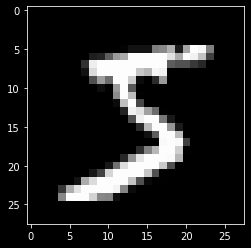

label: 0
image:


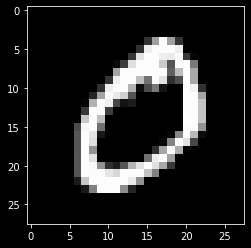

label: 4
image:


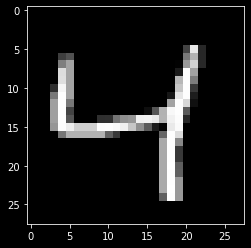

label: 1
image:


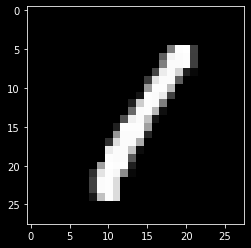

label: 9
image:


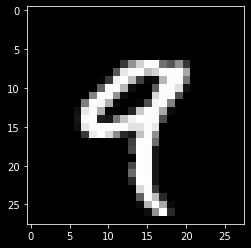

testing data:
label: 7
image:


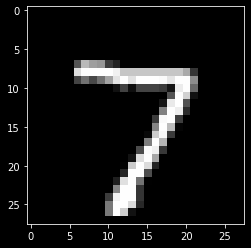

label: 2
image:


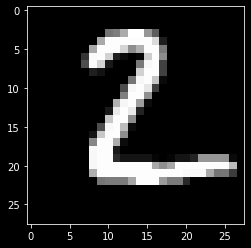

label: 1
image:


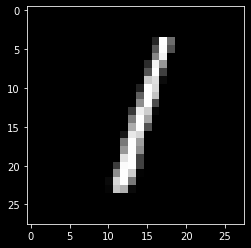

label: 0
image:


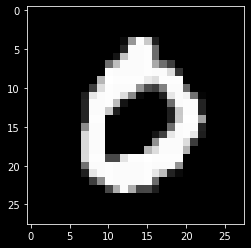

label: 4
image:


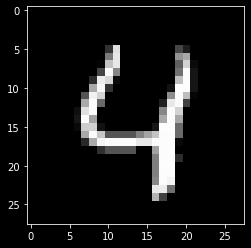

In [4]:
# Visualize MINIST
########### Write Your Code Here ###########
from matplotlib import pyplot as plt


print("training data:")
for i in range(5):
    print("label:", train_labels[i])
    print("image:")
    plt.imshow(np.reshape(train_images[i], (28, 28)), cmap="gray")
    plt.show()

print("testing data:")
for i in range(5):
    print("label:", test_labels[i])
    print("image:")
    plt.imshow(np.reshape(test_images[i], (28, 28)), cmap="gray")
    plt.show()
############################################

### Fit  Model

In [23]:
########### Write Your Code Here ###########
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn import preprocessing


# normalization
min_max = preprocessing.MinMaxScaler()
train_images = min_max.fit_transform(train_images)
test_images = min_max.fit_transform(test_images)

# 2-valued

best_acc = 0.0
best_threshold = 0.0
best_shrinkage = 0.0
good_thresholds = []
good_shrinkages = []
for threshold in np.arange(0.05, 1, 0.05):
    for shrinkage in np.arange(0.05, 1, 0.05):
        train_images_ = train_images.copy()
        test_images_ = test_images.copy()
        train_images_[train_images >= threshold] = 1
        train_images_[train_images < threshold] = 0
        test_images_[test_images >= threshold] = 1
        test_images_[test_images < threshold] = 0

        model = LinearDiscriminantAnalysis(solver='lsqr', shrinkage=shrinkage)
        model.fit(np.array(train_images_), train_labels)

        label_pred = model.predict(np.array(test_images_))
        acc = accuracy_score(test_labels, label_pred)
        #print("2-valued threshiold:" + str(threshold))
        #print("shrinkage:", shrinkage)
        #print("accuracy_score:", acc)
        #print()
        if acc > 0.88:
            good_thresholds.append(threshold)
            good_shrinkages.append(shrinkage)
        if acc > best_acc:
            best_acc = acc
            best_threshold = threshold
            best_shrinkage = shrinkage
print("good_thresholds:", good_thresholds)
print("good_shrinkages:", good_shrinkages)
############################################

good_thresholds: [0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.15000000000000002, 0.15000000000000002, 0.15000000000000002, 0.15000000000000002, 0.15000000000000002, 0.15000000000000002, 0.15000000000000002, 0.15000000000000002, 0.15000000000000002, 0.15000000000000002, 0.15000000000000002, 0.15000000000000002, 0.15000000000000002, 0.15000000000000002, 0.15000000000000002, 0.15000000000000002, 0.15000000000000002, 0.15000000000000002, 0.15000000000000002, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.35000000000000003, 0.35000000000000003, 0.35000000000000003, 0.35000

In [26]:
for threshold in np.arange(0.02, 0.04, 0.005):
    for shrinkage in np.arange(0.6, 0.68, 0.005):
        train_images_ = train_images.copy()
        test_images_ = test_images.copy()
        train_images_[train_images >= threshold] = 1
        train_images_[train_images < threshold] = 0
        test_images_[test_images >= threshold] = 1
        test_images_[test_images < threshold] = 0

        model = LinearDiscriminantAnalysis(solver='lsqr', shrinkage=shrinkage)
        model.fit(np.array(train_images_), train_labels)

        label_pred = model.predict(np.array(test_images_))
        acc = accuracy_score(test_labels, label_pred)
        if acc > best_acc:
            best_acc = acc
            best_threshold = threshold
            best_shrinkage = shrinkage

print("best_threshold:", best_threshold)
print("best_shrinkage:", best_shrinkage)
print("best_acc:", best_acc)

best_threshold: 0.035
best_shrinkage: 0.655
best_acc: 0.8875


## Evaluate model

In [27]:
########### Write Your Code Here ###########
print("best_threshold:", best_threshold)
print("best_shrinkage:", best_shrinkage)
print("best_acc:", best_acc)
############################################

best_threshold: 0.035
best_shrinkage: 0.655
best_acc: 0.8875


### Exercise 3: Qustions
- Q1:What are the advantages and disadvantages of LDA?
    - `Advantages: It is tagged with labels and is supervised. Hence it is with clear goal, and reflects differences between samples.`
    - `Disadvantages: It is weak when faced with parse data, especially when feature number is close to, or even larger than the sample size.`

- Q2 LDA can be used for dimensionality reduction, so can PCA. Please tell the difference between them?
    - `LDA is supervised, while PCA is not.`
    - `LDA inputs require labels, which enable it to distinguish different classes with its minimizing the variances within one class. PCA cannot.`
    - `So on the other side, PCA requires no labeling.`